In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

In [6]:
from keras.datasets import imdb
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=5000)

17464789/17464789 [==============================] - 6s 0us/step


In [7]:
print("y_train categories:", np.unique(y_train))
print("y_test categories:", np.unique(y_test))

y_train categories: [0 1]
y_test categories: [0 1]


In [4]:
unique, counts = np.unique(y_train, return_counts=True)
print("y_train distribution:", dict(zip(unique, counts)))

y_train distribution: {0: 12500, 1: 12500}


In [5]:
unique, counts = np.unique(y_test, return_counts=True)
print("y_test distribution:", dict(zip(unique, counts)))

y_test distribution: {0: 12500, 1: 12500}


In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [7]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 2,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 

In [8]:
from keras_preprocessing import sequence
x_train = sequence.pad_sequences(x_train, 500)
x_test = sequence.pad_sequences(x_test, 500)

In [9]:
x_train[10]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    1,  785,  189,  438,   47,
        110,  142,    7,    6,    2,  120,    4,  236,  378,    7,  153,
         19,   87,  108,  141,   17, 1004,    5,    2,  883,    2,   23,
          8,    4,  136,    2,    2,    4,    2,   43, 1076,   21, 1407,
        419,    5,    2,  120,   91,  682,  189, 2818,    5,    9, 1348,
         31,    7,    4,  118,  785,  189,  108,  126,   93,    2,   16,
        540,  324,   23,    6,  364,  352,   21,   14,    9,   93,   56,
         18,   11,  230,   53,  771,   74,   31,   34,    4, 2834,    7,
          4,   22,    5,   14,   11,  471,    9,    2,   34,    4,  321,
        487,    5,  116,   15,    2,    4,   22,   

In [10]:
word_to_id = imdb.get_word_index()

In [11]:
word_to_id = imdb.get_word_index()
print(type(word_to_id))
print(len(word_to_id))

<class 'dict'>
88584


In [12]:
word_to_id 

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [13]:
sorted_word_id = {}
sorted_keys = sorted(word_to_id, key=word_to_id.get)

for i in sorted_keys:
    sorted_word_id[i] = word_to_id[i]

sorted_word_id

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'he': 26,
 'be': 27,
 'one': 28,
 'all': 29,
 'at': 30,
 'by': 31,
 'an': 32,
 'they': 33,
 'who': 34,
 'so': 35,
 'from': 36,
 'like': 37,
 'her': 38,
 'or': 39,
 'just': 40,
 'about': 41,
 "it's": 42,
 'out': 43,
 'has': 44,
 'if': 45,
 'some': 46,
 'there': 47,
 'what': 48,
 'good': 49,
 'more': 50,
 'when': 51,
 'very': 52,
 'up': 53,
 'no': 54,
 'time': 55,
 'she': 56,
 'even': 57,
 'my': 58,
 'would': 59,
 'which': 60,
 'only': 61,
 'story': 62,
 'really': 63,
 'see': 64,
 'their': 65,
 'had': 66,
 'can': 67,
 'were': 68,
 'me': 69,
 'well': 70,
 'than': 71,
 'we': 72,
 'much': 73,
 'been': 74,
 'bad': 75,
 'get': 76,
 'will': 77,
 'do': 78,
 'also': 79,
 'into': 80,
 'people': 81,
 'other': 82,
 '

In [14]:
word_to_id = {i:(j+3) for i, j in word_to_id.items()}
word_to_id["#"] = 0
word_to_id["->"] = 1
word_to_id["!"] = 2

In [15]:
id_to_word = {idx:word for word, idx in word_to_id.items()} 

In [16]:
id_to_word[20]

'movie'

In [17]:
print(" ".join(id_to_word[id] for id in x_train[10]))
print(y_train[10]) 

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # -> french horror cinema has seen something of a ! over the last couple of years with great films such as inside and ! romance ! on to the scene ! ! the ! just slightly but stands head and ! over most modern horror titles and is surely one of the best french horror films ever made ! was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is ! by the excellent writing and acting that ! the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named ! sent to prison for ! he is put in a cell with three others the ! insane ! body building ! ! and his retarded boyfriend ! after a short while in the cell together they ! upon a hiding place in the wall that contains an old ! after ! part of it they soon realise its magical powers and realise they may be able to use it

# Model Oluşturma

In [18]:
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.models import Sequential

In [19]:
embedding_vector_length = 32 
model = Sequential() 
model.add(Embedding(5000, embedding_vector_length, input_length=500)) 
model.add(LSTM(100)) 
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________


In [20]:
results = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=500, verbose=1)

Epoch 1/10
50/50 [==============================] - 188s 4s/step - loss: 0.6668 - accuracy: 0.6392 - val_loss: 0.5970 - val_accuracy: 0.7480
Epoch 2/10
50/50 [==============================] - 249s 5s/step - loss: 0.5943 - accuracy: 0.7270 - val_loss: 0.5453 - val_accuracy: 0.7451
Epoch 3/10
50/50 [==============================] - 257s 5s/step - loss: 0.3860 - accuracy: 0.8343 - val_loss: 0.3355 - val_accuracy: 0.8596
Epoch 4/10
50/50 [==============================] - 257s 5s/step - loss: 0.2728 - accuracy: 0.8923 - val_loss: 0.2963 - val_accuracy: 0.8789
Epoch 5/10
50/50 [==============================] - 270s 5s/step - loss: 0.2246 - accuracy: 0.9141 - val_loss: 0.2992 - val_accuracy: 0.8740
Epoch 6/10
50/50 [==============================] - 293s 6s/step - loss: 0.2003 - accuracy: 0.9258 - val_loss: 0.3136 - val_accuracy: 0.8775
Epoch 7/10
50/50 [==============================] - 270s 5s/step - loss: 0.1976 - accuracy: 0.9276 - val_loss: 0.3172 - val_accuracy: 0.8790
Epoch 8/10
50

In [21]:
results.history

{'loss': [0.6667963266372681,
  0.5943267345428467,
  0.3859744966030121,
  0.2727830111980438,
  0.22460684180259705,
  0.20031027495861053,
  0.19758570194244385,
  0.17417879402637482,
  0.16925090551376343,
  0.1526673138141632],
 'accuracy': [0.63919997215271,
  0.7270399928092957,
  0.8342800140380859,
  0.8923199772834778,
  0.9141200184822083,
  0.9257599711418152,
  0.9276000261306763,
  0.937720000743866,
  0.9400399923324585,
  0.9465600252151489],
 'val_loss': [0.5969718098640442,
  0.5452910661697388,
  0.3354990482330322,
  0.2963162362575531,
  0.29922786355018616,
  0.3135591447353363,
  0.31718066334724426,
  0.3151127099990845,
  0.3225669264793396,
  0.33126649260520935],
 'val_accuracy': [0.7480000257492065,
  0.7451199889183044,
  0.8595600128173828,
  0.8788800239562988,
  0.873960018157959,
  0.8774799704551697,
  0.879040002822876,
  0.8737599849700928,
  0.8730800151824951,
  0.8712400197982788]}

In [22]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

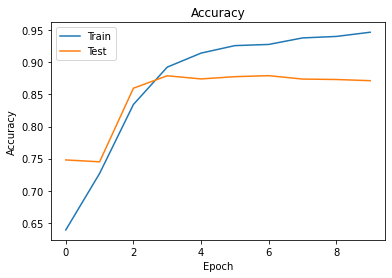

In [23]:
plt.figure()
plt.plot(results.history["accuracy"], label="Train")
plt.plot(results.history["val_accuracy"], label="Test")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

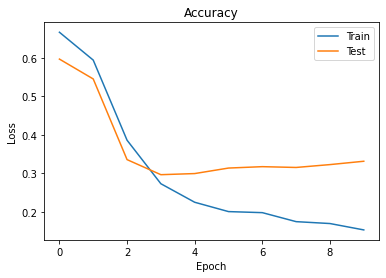

In [24]:
plt.figure()
plt.plot(results.history["loss"], label="Train")
plt.plot(results.history["val_loss"], label="Test")
plt.title("Accuracy")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show

In [25]:
model_eval = model.evaluate(x_test, y_test)

782/782 [==============================] - 115s 147ms/step - loss: 0.3313 - accuracy: 0.8712


In [26]:
model.save('imdb.h5')